In [3]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian

# The Hilbert-transform is the mathematician's term for the above integral transform that physicist's know as the Kramers-Kronig relations.
from scipy.fftpack import hilbert

In [4]:
freq = 100
interval = 1 / freq
begin = 0
end = 2
signal_freq = 2
time = np.arange(begin, end, interval)
y = np.sin(2*np.pi*signal_freq*time)
# y = gaussian(200, std=4)

In [5]:
hilbert_y = hilbert(y)

In [6]:
N = len(y)
U = fft(y)

M = N - N//2 - 1
# zero out negative frequency components
U[N//2+1:] = 2 * U[N//2+1:]
# double fft energy except zero frequency
U[1:N//2] = [0] * M

u = ifft(U)

In [7]:
print(" n     y from_scratch scipy")
for n in range(N):
    print('{:2d} {:+5.2f} {:+10.2f} {:+5.2f}'.format(n, y[n], u[n], hilbert_y[n]))

 n     y from_scratch scipy
 0 +0.00 -0.00+1.00j +1.00
 1 +0.13 +0.13+0.99j +0.99
 2 +0.25 +0.25+0.97j +0.97
 3 +0.37 +0.37+0.93j +0.93
 4 +0.48 +0.48+0.88j +0.88
 5 +0.59 +0.59+0.81j +0.81
 6 +0.68 +0.68+0.73j +0.73
 7 +0.77 +0.77+0.64j +0.64
 8 +0.84 +0.84+0.54j +0.54
 9 +0.90 +0.90+0.43j +0.43
10 +0.95 +0.95+0.31j +0.31
11 +0.98 +0.98+0.19j +0.19
12 +1.00 +1.00+0.06j +0.06
13 +1.00 +1.00-0.06j -0.06
14 +0.98 +0.98-0.19j -0.19
15 +0.95 +0.95-0.31j -0.31
16 +0.90 +0.90-0.43j -0.43
17 +0.84 +0.84-0.54j -0.54
18 +0.77 +0.77-0.64j -0.64
19 +0.68 +0.68-0.73j -0.73
20 +0.59 +0.59-0.81j -0.81
21 +0.48 +0.48-0.88j -0.88
22 +0.37 +0.37-0.93j -0.93
23 +0.25 +0.25-0.97j -0.97
24 +0.13 +0.13-0.99j -0.99
25 +0.00 +0.00-1.00j -1.00
26 -0.13 -0.13-0.99j -0.99
27 -0.25 -0.25-0.97j -0.97
28 -0.37 -0.37-0.93j -0.93
29 -0.48 -0.48-0.88j -0.88
30 -0.59 -0.59-0.81j -0.81
31 -0.68 -0.68-0.73j -0.73
32 -0.77 -0.77-0.64j -0.64
33 -0.84 -0.84-0.54j -0.54
34 -0.90 -0.90-0.43j -0.43
35 -0.95 -0.95-0.31j -0.31


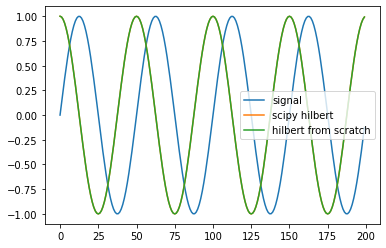

In [8]:
plt.plot(y, label='signal')
plt.plot(hilbert_y, label='scipy hilbert')
plt.plot(u.imag, label='hilbert from scratch')
plt.legend()
plt.show()

In [9]:
k = hilbert(u)
print(" n     y fft_hilbert fft_spect")
for n in range(N):
    print('{:2d} {:+5.2f} {:+10.2f} {:+5.2f}'.format(n, y[n], k[n], u[n]))

 n     y fft_hilbert fft_spect
 0 +0.00 +1.00+0.00j -0.00+1.00j
 1 +0.13 +0.99-0.13j +0.13+0.99j
 2 +0.25 +0.97-0.25j +0.25+0.97j
 3 +0.37 +0.93-0.37j +0.37+0.93j
 4 +0.48 +0.88-0.48j +0.48+0.88j
 5 +0.59 +0.81-0.59j +0.59+0.81j
 6 +0.68 +0.73-0.68j +0.68+0.73j
 7 +0.77 +0.64-0.77j +0.77+0.64j
 8 +0.84 +0.54-0.84j +0.84+0.54j
 9 +0.90 +0.43-0.90j +0.90+0.43j
10 +0.95 +0.31-0.95j +0.95+0.31j
11 +0.98 +0.19-0.98j +0.98+0.19j
12 +1.00 +0.06-1.00j +1.00+0.06j
13 +1.00 -0.06-1.00j +1.00-0.06j
14 +0.98 -0.19-0.98j +0.98-0.19j
15 +0.95 -0.31-0.95j +0.95-0.31j
16 +0.90 -0.43-0.90j +0.90-0.43j
17 +0.84 -0.54-0.84j +0.84-0.54j
18 +0.77 -0.64-0.77j +0.77-0.64j
19 +0.68 -0.73-0.68j +0.68-0.73j
20 +0.59 -0.81-0.59j +0.59-0.81j
21 +0.48 -0.88-0.48j +0.48-0.88j
22 +0.37 -0.93-0.37j +0.37-0.93j
23 +0.25 -0.97-0.25j +0.25-0.97j
24 +0.13 -0.99-0.13j +0.13-0.99j
25 +0.00 -1.00-0.00j +0.00-1.00j
26 -0.13 -0.99+0.13j -0.13-0.99j
27 -0.25 -0.97+0.25j -0.25-0.97j
28 -0.37 -0.93+0.37j -0.37-0.93j
29 -0.48 -0.

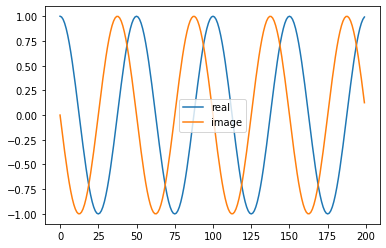

In [12]:
plt.plot(k.real, label='real')
plt.plot(k.imag, label='image')
plt.legend()
plt.show()

In [17]:
k_image = hilbert(k.real)
print(" n hilbert_imag imag")
for n in range(N):
    print('{:2d} {:+5.2f} {:+10.2f}'.format(n, k_image[n], k.imag[n]))

 n hilbert_imag imag
 0 -0.00      +0.00
 1 -0.13      -0.13
 2 -0.25      -0.25
 3 -0.37      -0.37
 4 -0.48      -0.48
 5 -0.59      -0.59
 6 -0.68      -0.68
 7 -0.77      -0.77
 8 -0.84      -0.84
 9 -0.90      -0.90
10 -0.95      -0.95
11 -0.98      -0.98
12 -1.00      -1.00
13 -1.00      -1.00
14 -0.98      -0.98
15 -0.95      -0.95
16 -0.90      -0.90
17 -0.84      -0.84
18 -0.77      -0.77
19 -0.68      -0.68
20 -0.59      -0.59
21 -0.48      -0.48
22 -0.37      -0.37
23 -0.25      -0.25
24 -0.13      -0.13
25 -0.00      -0.00
26 +0.13      +0.13
27 +0.25      +0.25
28 +0.37      +0.37
29 +0.48      +0.48
30 +0.59      +0.59
31 +0.68      +0.68
32 +0.77      +0.77
33 +0.84      +0.84
34 +0.90      +0.90
35 +0.95      +0.95
36 +0.98      +0.98
37 +1.00      +1.00
38 +1.00      +1.00
39 +0.98      +0.98
40 +0.95      +0.95
41 +0.90      +0.90
42 +0.84      +0.84
43 +0.77      +0.77
44 +0.68      +0.68
45 +0.59      +0.59
46 +0.48      +0.48
47 +0.37      +0.37
48 +0.25      +0.25

In [18]:
k_real = -1 * hilbert(k.imag)
print(" n hilbert_real real")
for n in range(N):
    print('{:2d} {:+5.2f} {:+10.2f}'.format(n, k_real[n], k.real[n]))

 n hilbert_real real
 0 +1.00      +1.00
 1 +0.99      +0.99
 2 +0.97      +0.97
 3 +0.93      +0.93
 4 +0.88      +0.88
 5 +0.81      +0.81
 6 +0.73      +0.73
 7 +0.64      +0.64
 8 +0.54      +0.54
 9 +0.43      +0.43
10 +0.31      +0.31
11 +0.19      +0.19
12 +0.06      +0.06
13 -0.06      -0.06
14 -0.19      -0.19
15 -0.31      -0.31
16 -0.43      -0.43
17 -0.54      -0.54
18 -0.64      -0.64
19 -0.73      -0.73
20 -0.81      -0.81
21 -0.88      -0.88
22 -0.93      -0.93
23 -0.97      -0.97
24 -0.99      -0.99
25 -1.00      -1.00
26 -0.99      -0.99
27 -0.97      -0.97
28 -0.93      -0.93
29 -0.88      -0.88
30 -0.81      -0.81
31 -0.73      -0.73
32 -0.64      -0.64
33 -0.54      -0.54
34 -0.43      -0.43
35 -0.31      -0.31
36 -0.19      -0.19
37 -0.06      -0.06
38 +0.06      +0.06
39 +0.19      +0.19
40 +0.31      +0.31
41 +0.43      +0.43
42 +0.54      +0.54
43 +0.64      +0.64
44 +0.73      +0.73
45 +0.81      +0.81
46 +0.88      +0.88
47 +0.93      +0.93
48 +0.97      +0.97